In [1]:
from PIL import Image

# Load image
image = Image.open('test.jpg')

# Get the image size
width, height = image.size
print(f"Image width: {width}, Image height: {height}")

# Get the image mode
mode = image.mode
print(f"Image mode: {mode}")

# Determine the number of channels
num_channels = len(image.getbands())
print(f"Number of channels: {num_channels}")

# Example with different modes:
# Grayscale image
gray_image = image.convert('L')
print(f"Grayscale image channels: {len(gray_image.getbands())}")

Image width: 960, Image height: 638
Image mode: RGB
Number of channels: 3
Grayscale image channels: 1


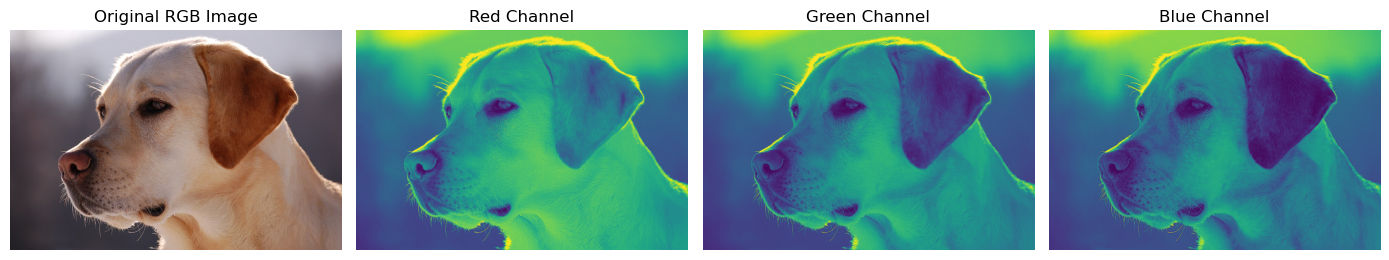

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg")
img_np = np.array(img)

# split channels
R, G, B = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]

# 3. visualization
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].imshow(img)
axs[0].set_title("Original RGB Image")
axs[0].axis("off")

axs[1].imshow(R)
axs[1].set_title("Red Channel")
axs[1].axis("off")

axs[2].imshow(G)
axs[2].set_title("Green Channel")
axs[2].axis("off")

axs[3].imshow(B)
axs[3].set_title("Blue Channel")
axs[3].axis("off")

plt.tight_layout()
plt.show()

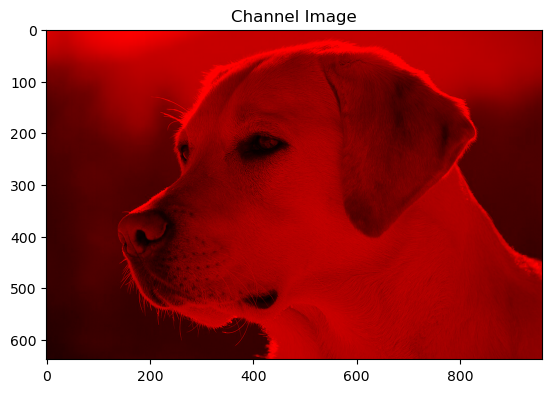

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg")
img_np = np.array(img)

# split channels
R, G, B = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]

# merge different channels
img_temp = np.zeros_like(img_np)
img_temp[:,:,0] = R
# img_temp[:,:,1] = G
# img_temp[:,:,2] = B
plt.imshow(img_temp)
plt.title("Channel Image")
plt.show()

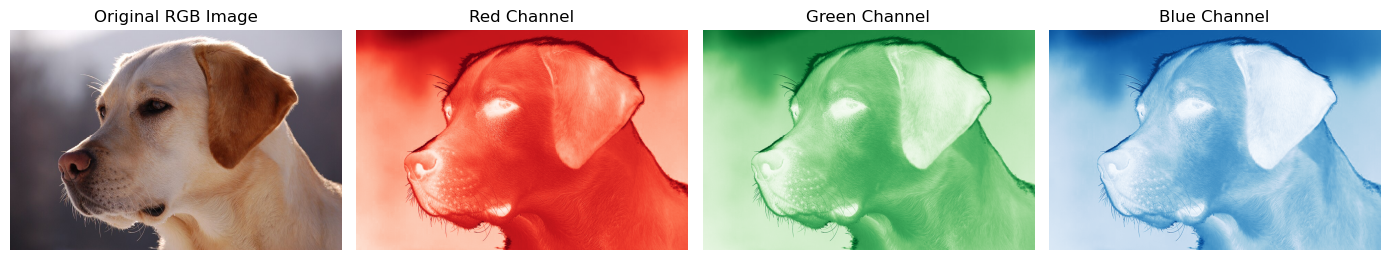

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg")
img_np = np.array(img)

# split channels
R, G, B = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]

# 3. visualization
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].imshow(img)
axs[0].set_title("Original RGB Image")
axs[0].axis("off")

axs[1].imshow(R, cmap="Reds")
axs[1].set_title("Red Channel")
axs[1].axis("off")

axs[2].imshow(G, cmap="Greens")
axs[2].set_title("Green Channel")
axs[2].axis("off")

axs[3].imshow(B, cmap="Blues")
axs[3].set_title("Blue Channel")
axs[3].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import os

img = Image.open('test.jpg')

# 2. split the channels
r, g, b = img.split()

# 3. save images
save_dir = "channels"
os.makedirs(save_dir, exist_ok=True)

r.save(os.path.join(save_dir, "R_channel.png"))
g.save(os.path.join(save_dir, "G_channel.png"))
b.save(os.path.join(save_dir, "B_channel.png"))

print("RGB channels have been saved successfully!")

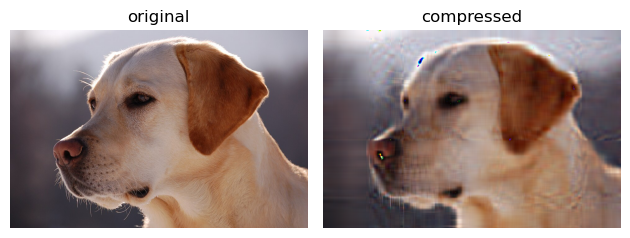

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg")
img_np = np.array(img)


R, G, B = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]

def reconstruct_image(channel):
    k=20
    U, s, Vt = np.linalg.svd(channel, full_matrices=False)
    S_k = np.diag(s[:k])
    return U[:, :k] @ S_k @ Vt[:k, :]

R_rec = reconstruct_image(R)
G_rec = reconstruct_image(G)
B_rec = reconstruct_image(B)

img_rec = np.zeros_like(img_np)
img_rec[:,:,0] = R_rec
img_rec[:,:,1] = G_rec
img_rec[:,:,2] = B_rec

img_rec = np.clip(img_rec, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"original")
plt.axis('off')

plt.subplot(1,2, 2)
plt.imshow(img_rec)
plt.title(f"compressed")
plt.axis('off')

plt.tight_layout()
plt.show()